# 01 - Data Cleaning Notebook - Isailton 

- Project: Machine Learning
- Dataset: Student performance (stundents-mat.csv)
- Team MIKE WHEELER (Safina, Charles, Isailton)

# ===============================
# DAY 1 — TOPIC SELECTION & DATA ACQUISITION
# ===============================

## Step 0 — Import Libraries & Project Setup

In [1]:
# Step 0 - Import required libraries
# pandas: data manipulation and analysis
# numpy: numerical computations
# These libraries cover data manipulation, visualization, and modeling

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

### Define Project Topic

In [2]:
# Define the ML problem
# Topic: Predict student academic success (pass/fail)
# Target: Whether a student passes based on socio-demographic and academic features

## Step 1 — Load Dataset

In [3]:
# Step 1 - Load the dataset using a RELATIVE PATH
# This ensures the code works for all team members after git push
# The dataset uses ';' as a separator

DATA_PATH = "../data/student-mat.csv"

df = pd.read_csv(DATA_PATH, sep=";")

# Display first rows to confirm successful loading
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Step 2 — Check Shape of the Data (Initial Dataset Inspection - EDA)

In [4]:
# Step 2 - Check the shape of the dataset
# This shows how many rows (observations) and columns (features) we have

df.shape

# Explanation:
# - Rows → number of students
# - Columns → number of features

(395, 33)

In [5]:
# Step 2 - Dataset information (data types & missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
# Step 2 - Display original column names
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# ===============================
# DAY 2 — DATA PREPARATION
# ===============================

In [7]:
# Step 2 - Rename columns following PEP8 conventions
# - Convert to lowercase
# - Replace spaces with underscores

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Confirm column names were updated
df.columns

# Why this matters:
# - Standardized column names improve readability and prevent coding errors.

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')

## Step 3 — Check Data Types

In [8]:
# Step 3 - Inspect data types of each column
# This helps decide how to clean and preprocess each feature

df.dtypes

# Explanation:
# - object → categorical variables
# - int64 / float64 → numerical variables

school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
dtype: object

## Step 4 — Check for Missing (NaN) Values

In [9]:
# Step 4 - Count missing values per column

df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

In [10]:
# Step 4 - Sort missing values for easier inspection

df.isna().sum().sort_values(ascending=False)

# Explanation:
# - This dataset has very few or no missing values, making it ideal for ML.

school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64

## Step 5 — Check and Remove Duplicates

In [11]:
# Step 5 - Check how many duplicated rows exist

df.duplicated().sum()

np.int64(0)

In [12]:
# Step 5 - Remove duplicated rows (if any)

df = df.drop_duplicates()

# Why this is important:
# - Duplicates can bias model training and evaluation.

## Step 6 — Split Dataset into Categorical and Numerical Features

In [13]:
# Step 6 - Separate categorical and numerical columns

categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(exclude="object").columns.tolist()

In [14]:
# Step 6 - Identify categorical columns (non-numeric)

# categorical_cols = df.select_dtypes(include="object").columns

# Step 6 - Identify numerical columns

# numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# categorical_cols, numerical_cols

# Explanation:
# - Different data types require different preprocessing strategies.

## Step 7 — Clean Categorical Features

### Step 7.1 — Exploratory Data Analysis (EDA)

#### Plot All Numerical Distributions

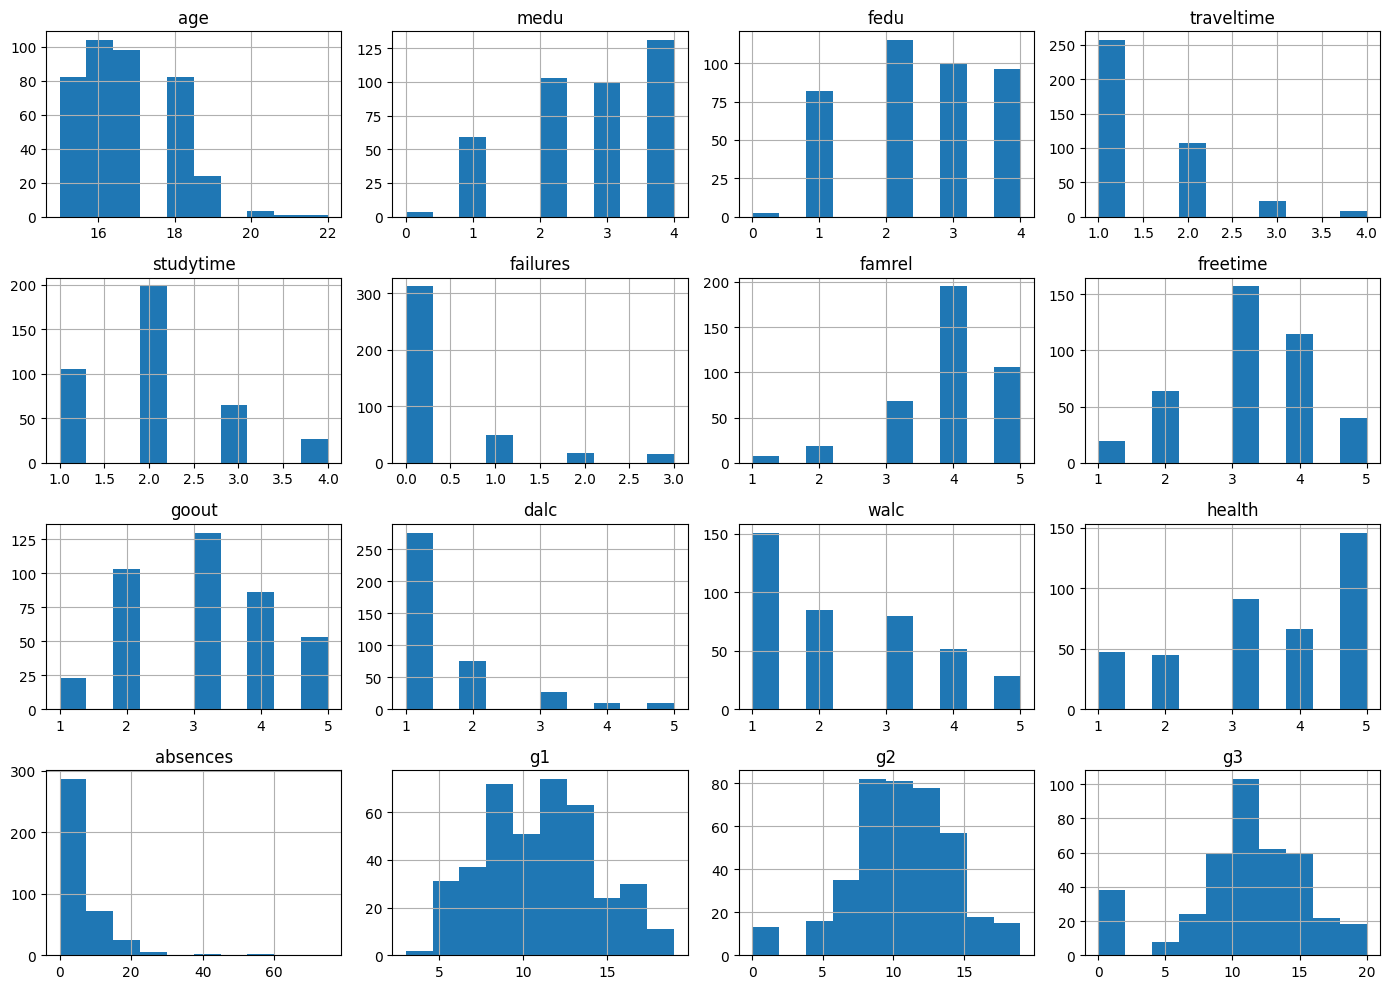

In [15]:
# Step 7.1 - Visualize distributions of numerical features

df[numerical_cols].hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

In [16]:
# Step 7.1 - Explore unique values in each categorical column
# This helps identify inconsistencies or typos

# for col in categorical_cols:
#    print(f"Column: {col}")
#    print(df[col].unique())
#    print("-" * 40)

# Explanation:
# - This step is a basic EDA technique to understand categorical distributions.



#### Boxplots for Outlier Detection

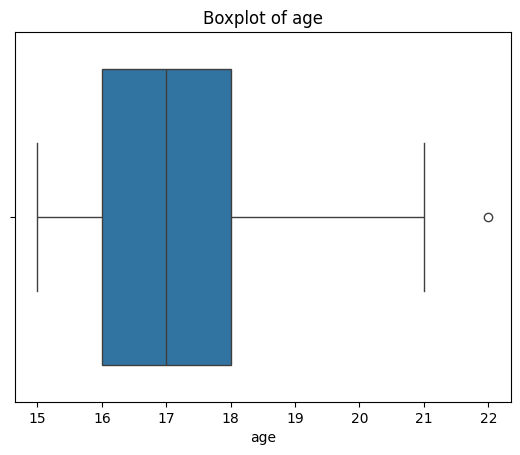

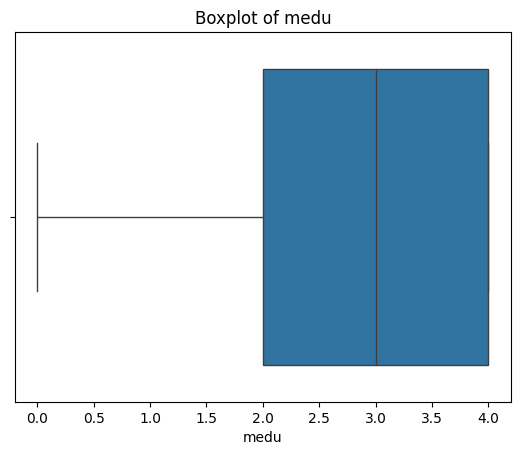

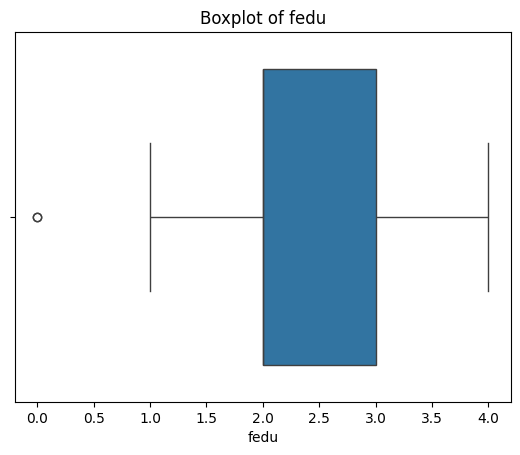

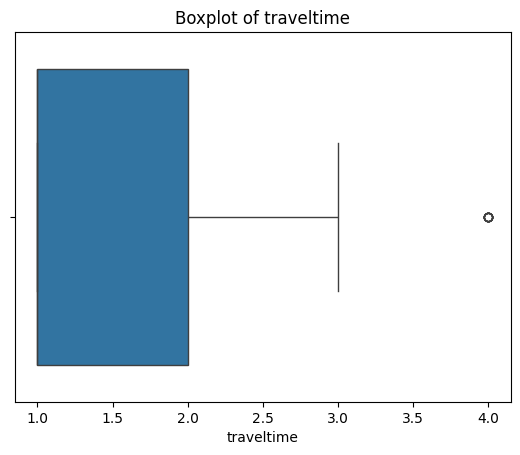

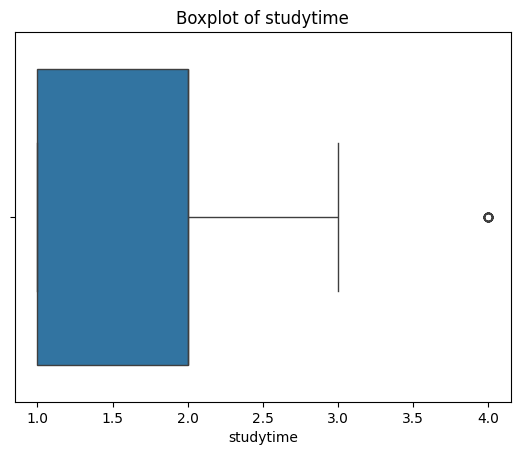

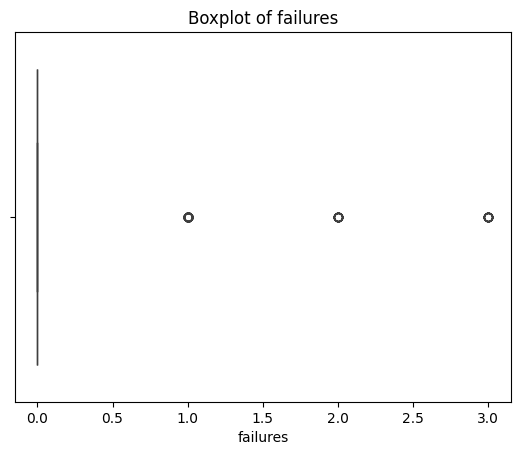

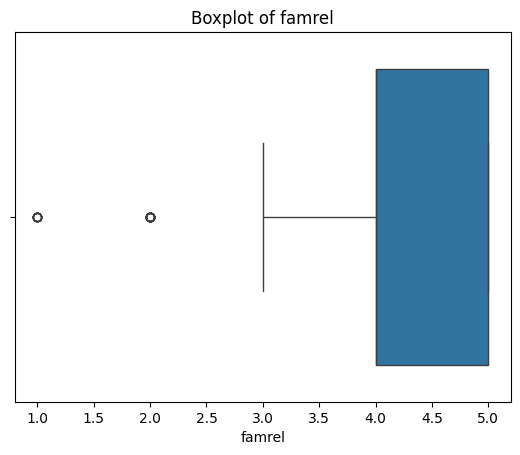

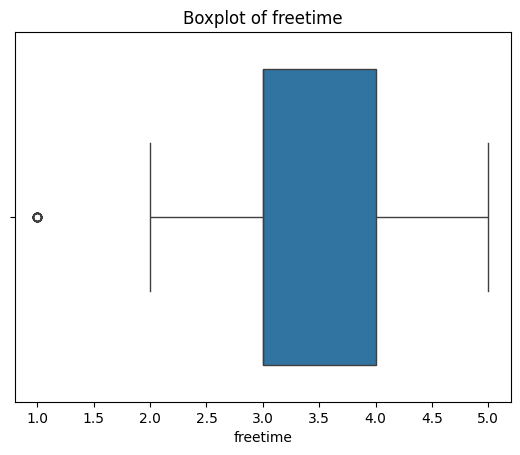

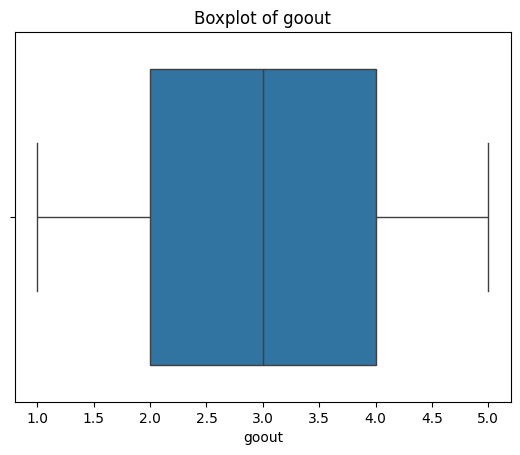

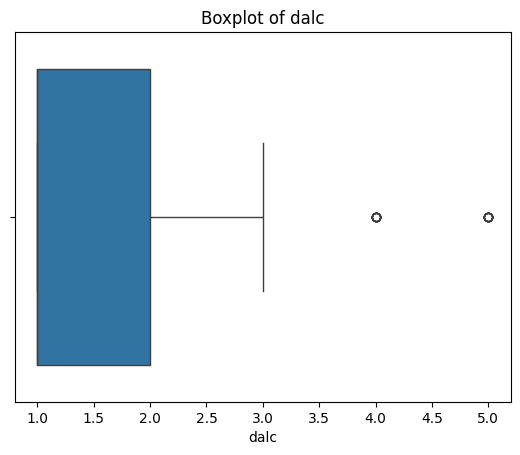

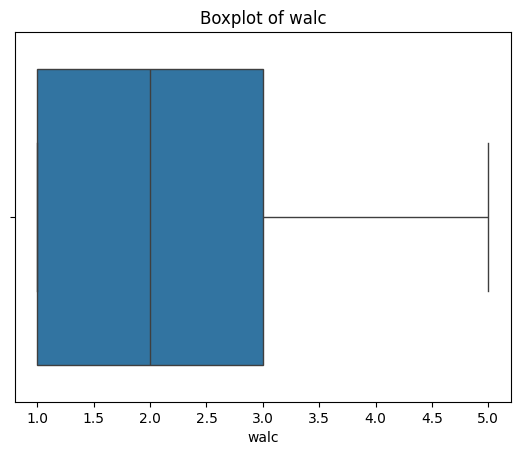

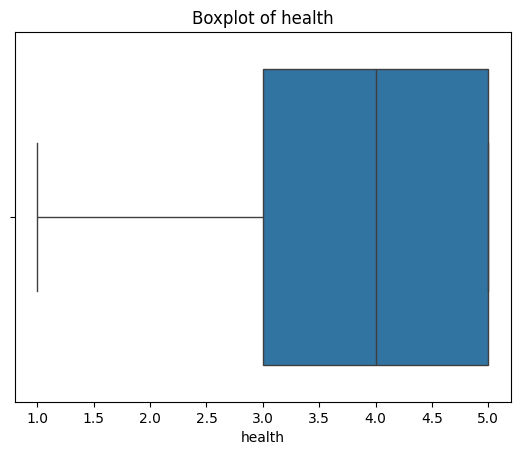

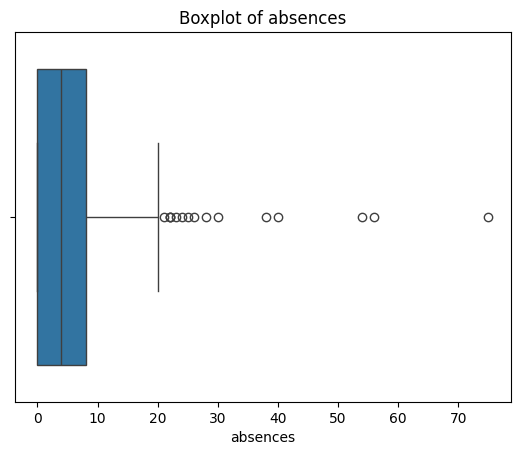

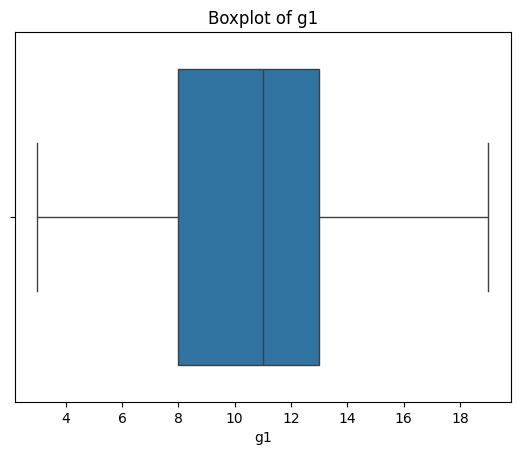

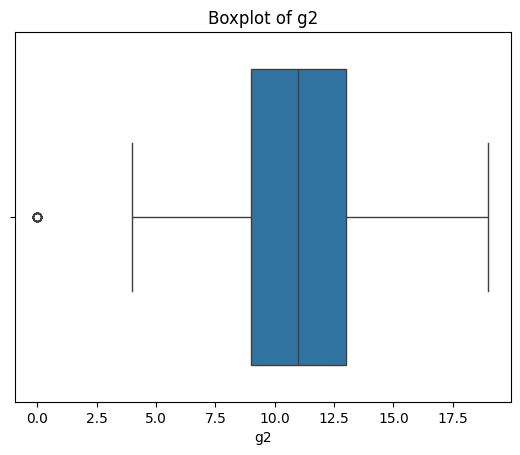

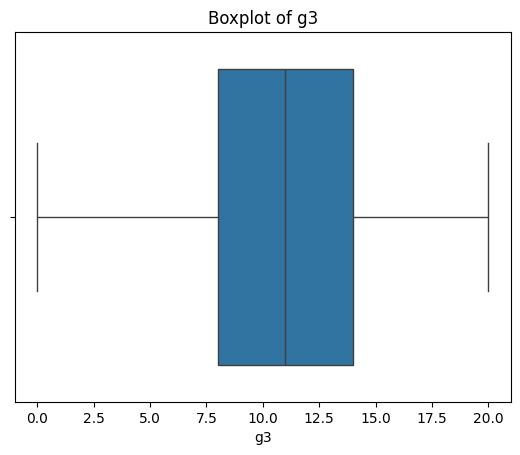

In [17]:
# Step 7.1 Boxplots to check for outliers

for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Step 7.2 — Handle Missing Values in Categorical Columns

#### Explore Categorical Unique Values

In [18]:
# Step 7.2 - Check unique values of categorical columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print("-" * 40)


school: ['GP' 'MS']
----------------------------------------
sex: ['F' 'M']
----------------------------------------
address: ['U' 'R']
----------------------------------------
famsize: ['GT3' 'LE3']
----------------------------------------
pstatus: ['A' 'T']
----------------------------------------
mjob: ['at_home' 'health' 'other' 'services' 'teacher']
----------------------------------------
fjob: ['teacher' 'other' 'services' 'health' 'at_home']
----------------------------------------
reason: ['course' 'other' 'home' 'reputation']
----------------------------------------
guardian: ['mother' 'father' 'other']
----------------------------------------
schoolsup: ['yes' 'no']
----------------------------------------
famsup: ['no' 'yes']
----------------------------------------
paid: ['no' 'yes']
----------------------------------------
activities: ['no' 'yes']
----------------------------------------
nursery: ['yes' 'no']
----------------------------------------
higher: ['yes' 'no']
-

#### Clean Categorical Data

In [19]:
# Step 7.2 - Fill missing categorical values with the mode (most frequent value)

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Why mode?
# - It preserves the most common category without distorting data.

## Step 8 — Clean Numerical Features

### Step 8.1 — Descriptive Statistics (EDA)

In [20]:
# Step 8.1 - Generate summary statistics for numerical features

df[numerical_cols].describe()

# What we learn here:
# - Min / Max values
# - Mean & median
# - Potential outliers

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Step 8.2 — Handle Missing Numerical Values

In [21]:
# Step 8.2 - Fill missing numerical values with the median
# Median is robust against outliers

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

## Step 9 — Final Data Validation

In [22]:
# Step 9 - Final overview of the cleaned dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [23]:
# Step 9 -  Ensure no missing values remain

df.isna().sum().sum()

# Expected result: 0

np.int64(0)

## Step 10 — Save Cleaned Dataset

In [24]:
# Step 10 - Save the cleaned dataset for next steps (feature engineering & modeling)

df.to_csv("../data/01_students_mat_cleaned_isailton.csv", index=False)

# Why this step matters:
# - Keeps cleaning separate from modeling and ensures reproducibility.

## Step 11 — Feature Engineering

### Step 11.1 — Create Binary Target Variable

In [25]:
# Step 11.1 - Create target variable: pass_fail
# Pass if final grade (g3) >= 10

df["pass_fail"] = (df["g3"] >= 10).astype(int)

### Step 11.2 — Drop Leakage Columns

In [26]:
# Step 11.2 - Remove grade columns that leak future information

df_model = df.drop(columns=["g1", "g2", "g3"])

# ===============================
# DAY 3 — MODEL DEVELOPMENT & INITIAL TUNING
# ===============================

## Step 12 — Split Features and Target

In [27]:
# Step 12 - Separate X (features) and y (target)

X = df_model.drop(columns=["pass_fail"])
y = df_model["pass_fail"]

## Step 13 — Train-Test Split

In [28]:
# Step 13 - Split data into training and testing sets (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Step 14 — Encode Categorical Features

In [29]:
# Step 14 - One-hot encode categorical variables

X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns to avoid mismatch
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

## Step 15 — Scale Numerical Features

In [30]:
# Step 15.0 - Identify numerical columns present in X_train
# This avoids KeyError if columns were dropped or renamed

numerical_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()

numerical_cols

['age',
 'medu',
 'fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'dalc',
 'walc',
 'health',
 'absences']

In [31]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assume X_train and X_test are your training and test DataFrames
# numerical_cols is a list of column names containing numerical features

# Initialize the scaler
scaler = StandardScaler()

# -------------------------------
# TRAINING DATA
# -------------------------------

# Step 1: Ensure numerical columns are float
# This prevents future warnings/errors when assigning scaled values
X_train[numerical_cols] = X_train[numerical_cols].astype(float)

# Step 2: Fit the scaler on training data and transform it
# StandardScaler standardizes features by removing the mean and scaling to unit variance
# Returns a numpy array of floats
scaled_train = scaler.fit_transform(X_train[numerical_cols])

# Step 3: Assign the scaled values back to the DataFrame
# Wrap the numpy array in a DataFrame to preserve column names and index
X_train.loc[:, numerical_cols] = pd.DataFrame(
    scaled_train, 
    columns=numerical_cols, 
    index=X_train.index
)

# -------------------------------
# TEST DATA
# -------------------------------

# Step 1: Ensure numerical columns are float (good practice)
X_test[numerical_cols] = X_test[numerical_cols].astype(float)

# Step 2: Transform the test data using the scaler fitted on training data
# Note: Do NOT fit again, only transform
scaled_test = scaler.transform(X_test[numerical_cols])

# Step 3: Assign scaled values back to the DataFrame
X_test.loc[:, numerical_cols] = pd.DataFrame(
    scaled_test, 
    columns=numerical_cols, 
    index=X_test.index
)



In [32]:
# Step 15.1 - Scale numerical features using StandardScaler
# Fit ONLY on training data to avoid data leakage

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train.loc[:, numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = scaler.transform(X_test[numerical_cols])

# Important Concept: Why do we fit only on X_train?
# - The model must not learn statistics from test data
# - Test data simulates unseen real-world data
# - This avoids data leakage

In [33]:
# Step 15.2 - Verify scaling worked

X_train[numerical_cols].describe()

# You should see:
# - mean ≈ 0
# - std ≈ 1

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,dalc,walc,health,absences
count,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02,3.160000e+02
mean,-9.696885e-17,2.529622e-17,5.621382e-18,5.340313e-17,-3.513364e-17,-3.934968e-17,-1.405346e-17,-1.405346e-18,1.686415e-17,3.091760e-17,-1.018876e-17,1.686415e-17,-1.686415e-17
std,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00,1.001586e+00
min,-1.305332e+00,-2.470899e+00,-2.313505e+00,-6.699742e-01,-1.262660e+00,-4.425891e-01,-3.184526e+00,-2.275709e+00,-1.940230e+00,-5.544339e-01,-1.021160e+00,-1.850831e+00,-6.887051e-01
25%,-5.241106e-01,-6.676564e-01,-4.627009e-01,-6.699742e-01,-1.262660e+00,-4.425891e-01,9.335745e-02,-2.697842e-01,-1.038594e+00,-5.544339e-01,-1.021160e+00,-4.085065e-01,-6.887051e-01
50%,2.571109e-01,2.339651e-01,-4.627009e-01,-6.699742e-01,-4.619487e-02,-4.425891e-01,9.335745e-02,-2.697842e-01,-1.369574e-01,-5.544339e-01,-2.565000e-01,3.126559e-01,-3.156237e-01
75%,1.038332e+00,1.135587e+00,4.627009e-01,7.228669e-01,-4.619487e-02,-4.425891e-01,1.185985e+00,7.331782e-01,7.646788e-01,5.138655e-01,5.081604e-01,1.033818e+00,3.061786e-01
max,4.163218e+00,1.135587e+00,1.388103e+00,3.508549e+00,2.386735e+00,3.553358e+00,1.185985e+00,1.736141e+00,1.666315e+00,3.718764e+00,2.037481e+00,1.033818e+00,8.638329e+00


### Feature Scaling

Numerical features were scaled using `StandardScaler`.
The scaler was fitted on the training data only and then applied to the test data
to prevent data leakage and ensure fair model evaluation.

In [34]:
# Step 15 - Scale numerical features using StandardScaler

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Step 16 — Baseline Model (Logistic Regression)

In [35]:
# Step 16 - Train baseline Logistic Regression model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

accuracy_score(y_test, y_pred_lr)

0.6582278481012658

# ===============================
# DAY 4 — ADVANCED MODELING & ENSEMBLES
# ===============================

## Step 17 — Decision Tree Model

In [36]:
# Step 17 - Train Decision Tree model

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.6582278481012658

## Step 18 — Random Forest (Bagging)

In [37]:
# Step 18 - Train Random Forest model

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.6835443037974683

## Step 19 — Gradient Boosting

In [38]:
# Step 19 - Train Gradient Boosting model

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
accuracy_score(y_test, y_pred_gb)

0.620253164556962

## Step 20 — AdaBoost

In [39]:
# Step 20 - Train AdaBoost model

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
accuracy_score(y_test, y_pred_ada)

0.6329113924050633

## Step 21 — Model Comparison

In [40]:
# Step 21 - Compare model performances

model_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "AdaBoost"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_ada)
    ]
})

model_results.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.683544
0,Logistic Regression,0.658228
1,Decision Tree,0.658228
4,AdaBoost,0.632911
3,Gradient Boosting,0.620253


## Step 22 — Best Model Evaluation

In [41]:
# Step 22 - Detailed evaluation of best model (Random Forest example)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.54      0.27      0.36        26
           1       0.71      0.89      0.79        53

    accuracy                           0.68        79
   macro avg       0.63      0.58      0.57        79
weighted avg       0.65      0.68      0.65        79



## Step 23 — Hyperparameter Tuning with GridSearch (Random Forest)

In [42]:
# Step 23 - Hyperparameter tuning using GridSearchCV
# We tune Random Forest since it performed best previously

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# Set up GridSearch
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Fit GridSearch using training data only
grid_search.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter c

## Step 24 — Best Hyperparameters

In [43]:
# Step 24 - Display the best parameters found

grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

## Step 25 — Train Optimized Random Forest Model

In [44]:
# Step 25 - Train Random Forest using best parameters

best_rf = grid_search.best_estimator_

# Predict on test data
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate performance
accuracy_score(y_test, y_pred_best_rf)

0.6455696202531646

## Step 26 — Final Evaluation Metrics

In [45]:
# Step 26 - Detailed evaluation of optimized model

print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.42      0.19      0.26        26
           1       0.69      0.87      0.77        53

    accuracy                           0.65        79
   macro avg       0.55      0.53      0.51        79
weighted avg       0.60      0.65      0.60        79



# ===============================
# MODEL INTERPRETATION
# ===============================

## Step 27 — Feature Importance Extraction

In [46]:
# Step 27 - Extract feature importance from Random Forest
# Feature importance tells us which variables influence predictions most

feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": best_rf.feature_importances_
}).sort_values(by="importance", ascending=False)

## Step 28 — Top 15 Most Important Features

In [47]:
# Step 28 - Display the most influential features

feature_importance.head(15)

,feature,importance
5,failures,0.116107
12,absences,0.098594
8,goout,0.063806
0,age,0.049905
10,walc,0.040511
11,health,0.039925
7,freetime,0.037721
2,fedu,0.035011
6,famrel,0.034964
1,medu,0.032888


## Step 29 — Visualize Feature Importance

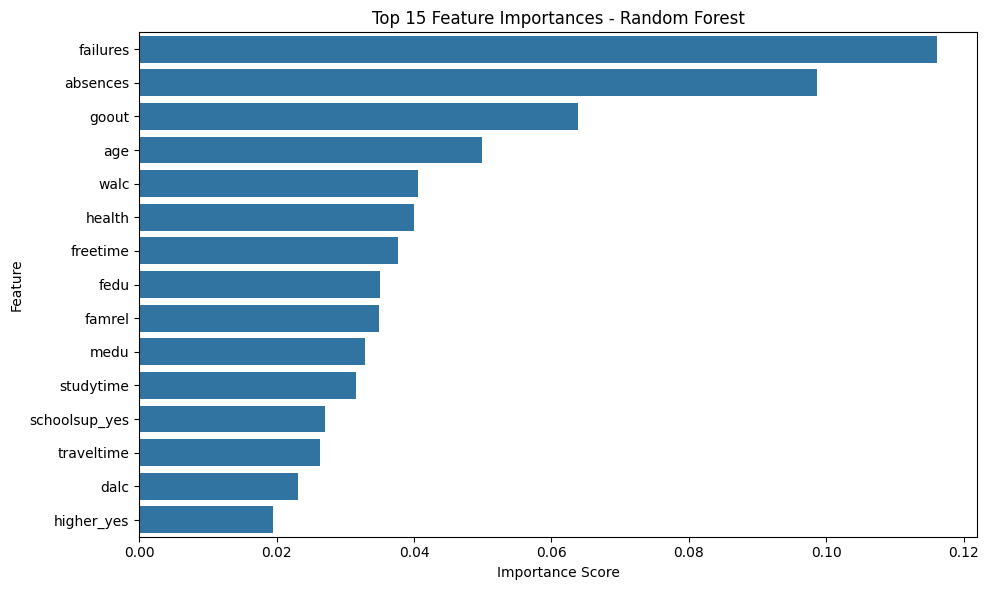

In [48]:
# Step 29 - Plot feature importance for interpretability

plt.figure(figsize=(10, 6))
sns.barplot(
    x="importance",
    y="feature",
    data=feature_importance.head(15)
)
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# ===============================
# STEP 30 — INTERPRETATION & BUSINESS INSIGHTS
# ===============================

# Step 30 - Interpretation Notes (Markdown cell recommended)

"""
Key Insights:
- Academic history (study time, failures, absences) strongly influences performance
- Family support and parental education show moderate impact
- Lifestyle features (internet, activities) contribute but less strongly

Why this matters:
- Helps educators identify at-risk students early
- Enables targeted academic interventions
- Improves model transparency and trust
"""

# ===============================
# STEP 31 — CONFUSION MATRIX VISUALIZATION
# ===============================

In [49]:
# Step 31 - Import required tools for confusion matrix visualization

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Step 32 — Generate the Confusion Matrix

In [50]:
# Step 32 - Generate confusion matrix using true labels and predictions
# y_test: true labels
# y_pred_best_rf: predictions from the optimized Random Forest model

cm = confusion_matrix(y_test, y_pred_best_rf)
cm

array([[ 5, 21],
       [ 7, 46]])

## Step 33 — Visualize the Confusion Matrix

<Figure size 600x600 with 0 Axes>

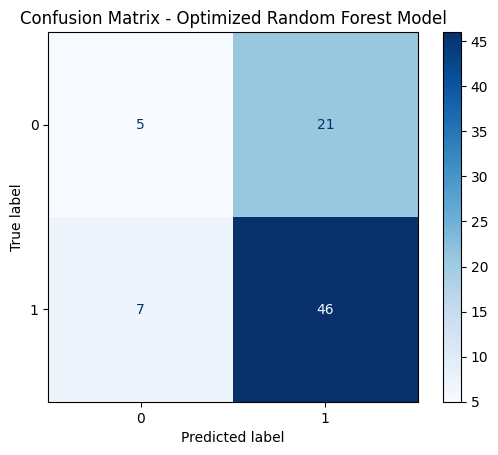

In [51]:
# Step 33 - Plot confusion matrix
# This helps visualize correct vs incorrect predictions

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=best_rf.classes_
)

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Optimized Random Forest Model")
plt.show()

# ===============================
# STEP 34 — INTERPRETATION (MARKDOWN CELL)
# ===============================

"""
How to read the confusion matrix:

- Top-left: True Negatives
- Top-right: False Positives
- Bottom-left: False Negatives
- Bottom-right: True Positives

Why this matters:
- Shows where the model makes mistakes
- Helps assess whether errors are acceptable
- Useful for real-world decisions (e.g. identifying at-risk students)

Model Insight:
- A high number of True Positives means good detection of successful students
- False Negatives are critical if predicting academic failure
"""

# ===============================
# STEP 35 — SHAP VALUES FOR MODEL EXPLAINABILITY
# ===============================

## Step 35.1 — Install & Import SHAP

In [52]:
# Step 35.1 - Install SHAP (run once, then comment out)
#!pip install shap

In [53]:
# Step 35.1 - Import SHAP and required libraries

# import shap
# import numpy as np
# import pandas as pd

## Step 35.2 — Initialize SHAP Explainer

In [54]:
# Step 35.2 - Initialize SHAP explainer for tree-based models
# TreeExplainer is optimized for Random Forests & Gradient Boosting

# explainer = shap.TreeExplainer(best_rf)

## Step 35.3 — Calculate SHAP Values

In [55]:
# Step 35.3 - Calculate SHAP values for the test set
# This explains each prediction made by the model

# shap_values = explainer.shap_values(X_test)

## Step 35.4 — Global Feature Importance (Summary Plot)

In [56]:
# Step 35.4 - SHAP summary plot (global feature importance)
# Shows which features impact predictions the most

# shap.summary_plot(
#    shap_values[1],  # Class 1 (e.g. student passes)
#    X_test,
#    plot_type="bar"
#)

# What this plot tells us:
# - Features at the top have the highest impact
# - Magnitude shows importance
# - Ideal for slides & reporting

## Step 35.5 — Detailed SHAP Summary Plot (Distribution)

In [57]:
# Step 35.5 - Detailed SHAP summary plot
# Shows how feature values influence predictions (positive/negative)

# shap.summary_plot(
#    shap_values[1],
#    X_test
#)

# Interpretation:
# - Red = high feature value
# - Blue = low feature value
# - Right = increases probability of success
# - Left = decreases probability

## Step 35.6 — Local Explanation (Single Prediction)

In [58]:
# Step 35.6 - Explain a single student's prediction
# Select one test instance

#index = 0  # change index to inspect another student

#shap.force_plot(
#    explainer.expected_value[1],
#    shap_values[1][index],
#    X_test.iloc[index],
#    matplotlib=True
#)

# Why this matters:
# - Explains why the model predicted success/failure
# - Extremely valuable for ethical AI & transparency

# ===============================
# STEP 36 — INTERPRETATION (MARKDOWN CELL)
# ===============================

"""
SHAP Interpretation Summary:

- SHAP values explain individual predictions clearly
- Positive SHAP values push prediction toward success
- Negative SHAP values push toward failure

Global Insights:
- Features like study time, failures, and absences are key drivers
- Behavioral factors often outweigh demographic ones

Why SHAP is important:
- Transparency & trust
- Model debugging
- Ethical decision-making
- Strong rubric & presentation impact
"""